<a href="https://colab.research.google.com/github/akrampathan07/Time-Series-Forecasting/blob/main/SeasonalData_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Seattle - weather Data from 12/31/2011 to 12/30/2015

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('seattle_weather.csv')
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [ ]:
# Drop duplicate rows (if any)
df = df.drop_duplicates()

df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


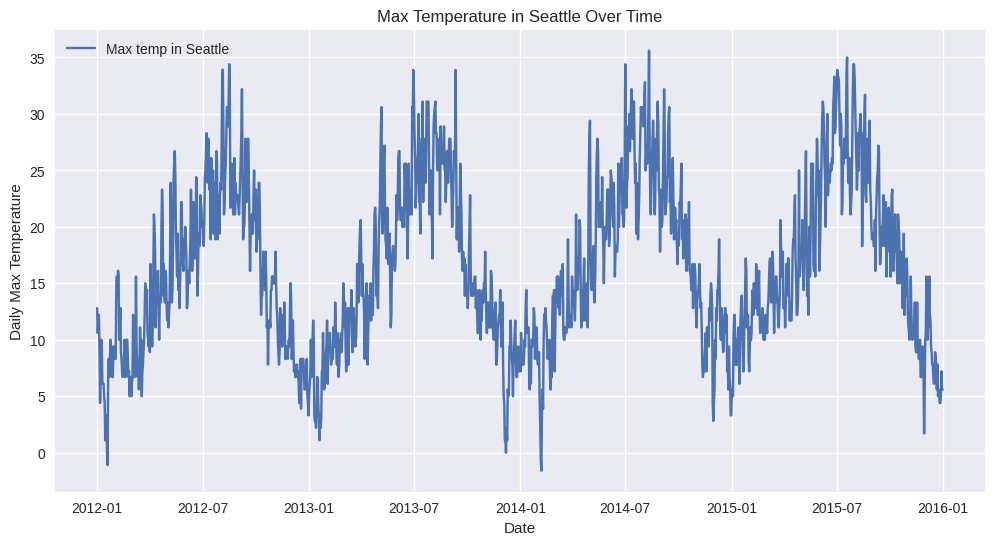

In [ ]:
# Plotting the max temperature over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max'], label='Max temp in Seattle')
plt.title('Max Temperature in Seattle Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Max Temperature')
plt.legend()
plt.show()

Seasonal Decomposition before seasonal differencing

<Figure size 1200x800 with 0 Axes>

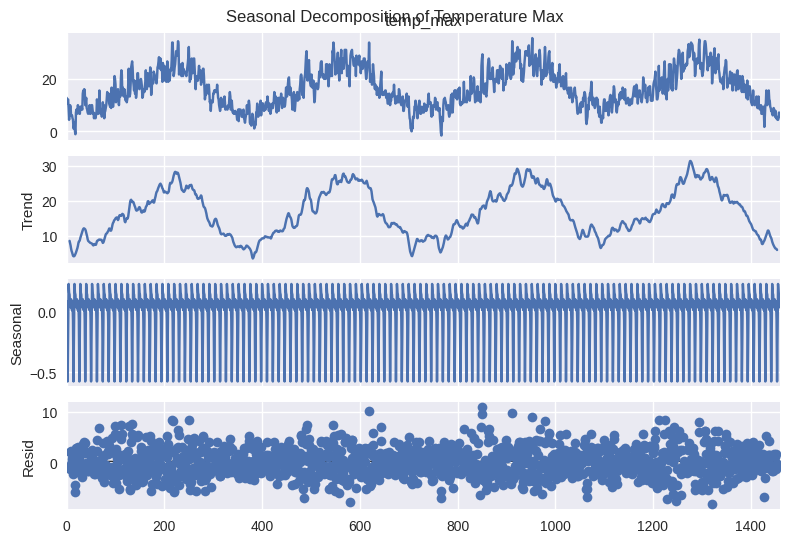

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Perform seasonal decomposition
result = seasonal_decompose(df['temp_max'], model='additive', period=12)  # Adjust the period based on your seasonality

# Plot the result
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of Temperature Max')
plt.show()


From this graph we can see that this is a Seasonal Time series

## Augmented Dickey–Fuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_original = adfuller(df['temp_max'])
print('ADF Statistic (Original):', result_original[0])
print('p-value (Original):', result_original[1])
print('Critical Values (Original):', result_original[4])

ADF Statistic (Original): -2.4292049694648137
p-value (Original): 0.13366259188431406
Critical Values (Original): {'1%': -3.4348772553489617, '5%': -2.8635394783531085, '10%': -2.5678345067434516}


p-value is not less than 0.05 so this is not a Stationary Time series.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np


<Figure size 1200x600 with 0 Axes>

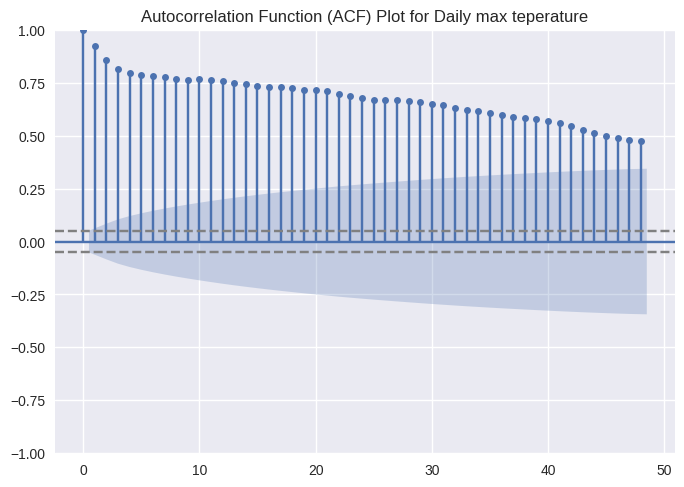

In [ ]:
# Plot ACF for 'temp_max'
plt.figure(figsize=(12, 6))
acf_plot_close = plot_acf(df['temp_max'].dropna(), lags=48, alpha=0.05)  # alpha sets confidence interval (default is 95%)

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['temp_max'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['temp_max'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('Autocorrelation Function (ACF) Plot for Daily max teperature')
plt.show()

## Now Performing Seasonal Differencing

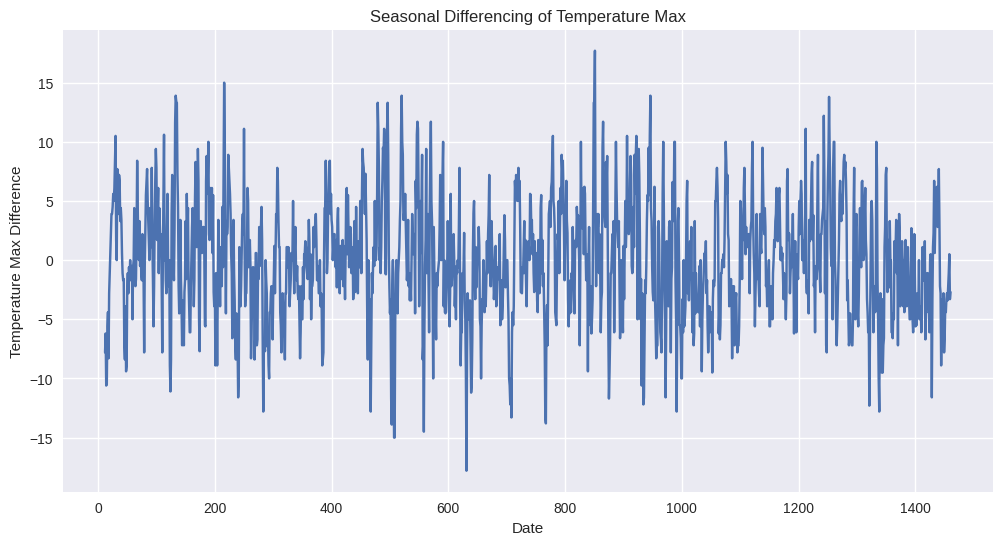

In [ ]:
# Perform seasonal differencing (our seasonality is 12 months)
#seasonal_difference = df['temp_max'].diff(12)
df['temp_max_sdiff'] = df['temp_max'].diff(12).dropna()
# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df['temp_max_sdiff'])
plt.title('Seasonal Differencing of Temperature Max')
plt.xlabel('Date')
plt.ylabel('Temperature Max Difference')
plt.show()

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_sdiff
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,NaN
1,2012-01-02,10.9,10.6,2.8,4.5,rain,NaN
2,2012-01-03,0.8,11.7,7.2,2.3,rain,NaN
3,2012-01-04,20.3,12.2,5.6,4.7,rain,NaN
4,2012-01-05,1.3,8.9,2.8,6.1,rain,NaN


Seasonal Decomposition after seasonal differencing

In [ ]:
# Fill NaN values with the mean
df['temp_max_sdiff'].fillna(df['temp_max_sdiff'].mean(), inplace=True)
print(df.isnull().sum())

date              0
precipitation     0
temp_max          0
temp_min          0
wind              0
weather           0
temp_max_sdiff    0
dtype: int64


<Figure size 1200x800 with 0 Axes>

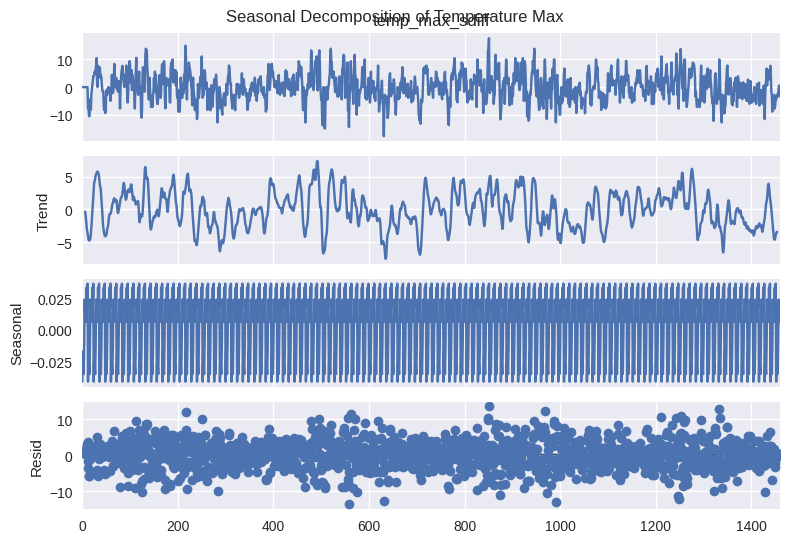

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Perform seasonal decomposition
result = seasonal_decompose(df['temp_max_sdiff'], model='additive', period=12)  # Adjust the period based on your seasonality

# Plot the result
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Seasonal Decomposition of Temperature Max')
plt.show()


In [ ]:
df.head()


,date,precipitation,temp_max,temp_min,wind,weather,temp_max_sdiff
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.02519
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.02519
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.02519
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.02519
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-0.02519


In [ ]:
#ADF test after seasonal differencing
from statsmodels.tsa.stattools import adfuller
result_original = adfuller(df['temp_max_sdiff'])
print('ADF Statistic (Original):', result_original[0])
print('p-value (Original):', result_original[1])
print('Critical Values (Original):', result_original[4])

ADF Statistic (Original): -6.916471069768624
p-value (Original): 1.1759720740411666e-09
Critical Values (Original): {'1%': -3.434911997169608, '5%': -2.863554810504947, '10%': -2.567842671398422}


Now P-value is less than 0.05 so our time series is stationary.

# ACF Plot

<Figure size 1200x600 with 0 Axes>

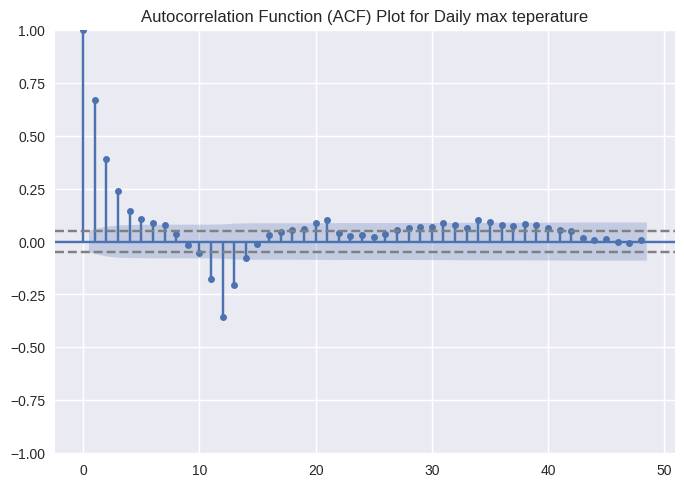

In [ ]:
# Plot ACF for 'temp_max'
plt.figure(figsize=(12, 6))
acf_plot_temp = plot_acf(df['temp_max_sdiff'].dropna(), lags=48, alpha=0.05)  # alpha sets confidence interval (default is 95%)

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['temp_max_sdiff'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['temp_max_sdiff'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('Autocorrelation Function (ACF) Plot for Daily max teperature')
plt.show()

# PACF PLOT

<Figure size 1200x600 with 0 Axes>

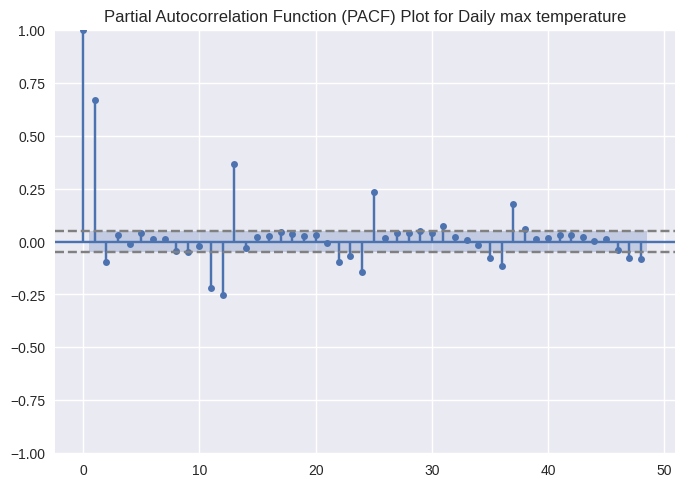

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
pacf_plot_temp = plot_pacf(df['temp_max_sdiff'].dropna(), lags=48, alpha=0.05)

# Add a dotted line at the significance threshold
plt.axhline(y=-1.96/np.sqrt(len(df['temp_max_sdiff'])), linestyle='--', color='gray')  # Adjust for desired confidence level
plt.axhline(y=1.96/np.sqrt(len(df['temp_max_sdiff'])), linestyle='--', color='gray')   # Adjust for desired confidence level

plt.title('Partial Autocorrelation Function (PACF) Plot for Daily max temperature')
plt.show()


From ACF and PACF plot we can see that this is AR(2) model with 2 significant lags in PACF where as in ACF it is gradually decreasing.
Also we can try ARMA(1,1) model

In [ ]:
pip install pmdarima

# Applying SARIMA model

In [ ]:
import itertools
import warnings

# Define the p,d and q parameters to take any value between 0 and 2
p=d=q= range(0,2)

# Generate all different combinatins of p,d and q triplets
pdq= list(itertools.product(p,d,q))

#Generate all different combinations of seasonal p,d and q triplets
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of Parameter comnbinations for Seasonal ARIMA...')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))

Examples of Parameter comnbinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod= sm.tsa.statespace.SARIMAX(df['temp_max_sdiff'],
                                     order= param,
                                     seasonal_order= param_seasonal,
                                     enforce_stationarity= False,
                                     enforce_invertibility= False)
      results= mod.fit()
      print(f'SARIMA{param}x{param_seasonal}12- AIC: {results.aic}')
    except:
      continue



SARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC: 8830.89735577664
SARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC: 8572.227994145871
SARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC: 10210.919562837242
SARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC: 8749.918495634543
SARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC: 8580.108969733079
SARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC: 8562.160687113126
SARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC: 9370.38016831554
SARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC: 8572.973690071032
SARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC: 8155.153273930063
SARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC: 7799.468914148207
SARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC: 9591.80705671347
SARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC: 8086.429418951644
SARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC: 7845.693321597429
SARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC: 7791.711735677894
SARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC: 8738.640216711687
SARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC: 7838.786001406963
SARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC: 8229.93626047694
SARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC: 7234.90931599

SARIMA(1, 1, 1)x(0, 0, 1, 12)12- AIC: 7064.906034920974  has the lowest AIC among all this.  so i am going to apply this to my model

In [ ]:
Best_model=  sm.tsa.statespace.SARIMAX(df['temp_max_sdiff'],
                                     order= (1,1,1),
                                     seasonal_order= (0,0,1,12),
                                     enforce_stationarity= False,
                                     enforce_invertibility= False)
results= Best_model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6267      0.031     19.917      0.000       0.565       0.688
ma.L1         -1.1088      0.024    -46.244      0.000      -1.156      -1.062
ma.S.L12      -1.0082      0.017    -60.347      0.000      -1.041      -0.975
sigma2         5.9641      0.341     17.493      0.000       5.296       6.632


The coef column shows the weight (importance) of each feature and how one impacts the time series.

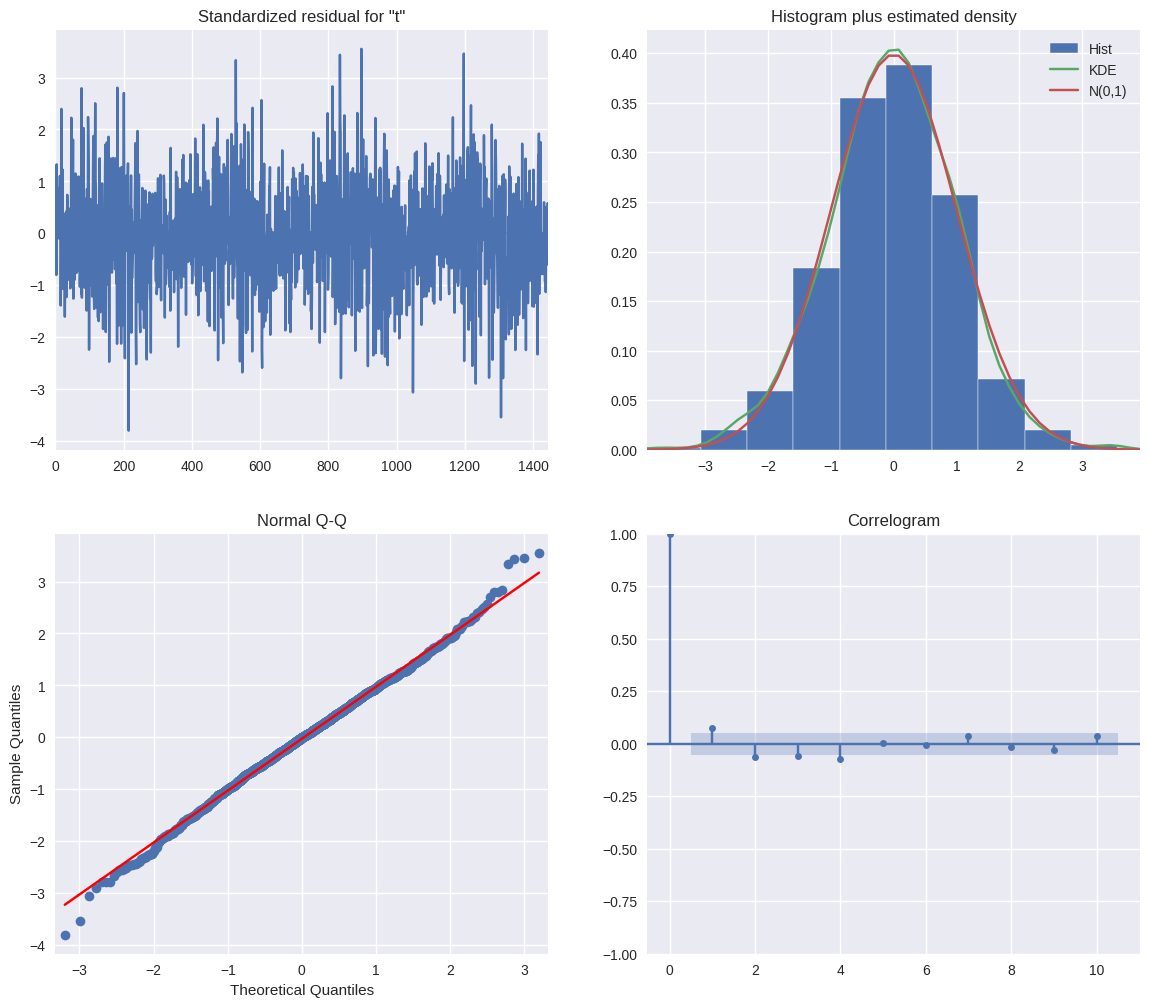

In [ ]:
results.plot_diagnostics(figsize=(14,12))
plt.show()

The red KDE line closely follows the N(0, 1) line in the top right plot (where N(0, 1) is the conventional notation for a normal distribution with mean 0 and standard deviation of 1). This suggests that the residuals are regularly distributed.

The qq-plot on the bottom left illustrates that the ordered residual distribution (blue dots) matches the linear trend of samples drawn from a typical normal distribution with N(0, 1). Again, this strongly suggests that the residuals are normally  distributed.


The residuals over time (top left figure) do not appear to be seasonal and instead appear to be white noise. The autocorrelation (i.e. correlogram) figure on the bottom right confirms this, demonstrating that the time series residuals have a low correlation with lagged copies of themselves.


# Validate Forecast

Confidence Interval

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_sdiff
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,-0.02519
1,2012-01-02,10.9,10.6,2.8,4.5,rain,-0.02519
2,2012-01-03,0.8,11.7,7.2,2.3,rain,-0.02519
3,2012-01-04,20.3,12.2,5.6,4.7,rain,-0.02519
4,2012-01-05,1.3,8.9,2.8,6.1,rain,-0.02519


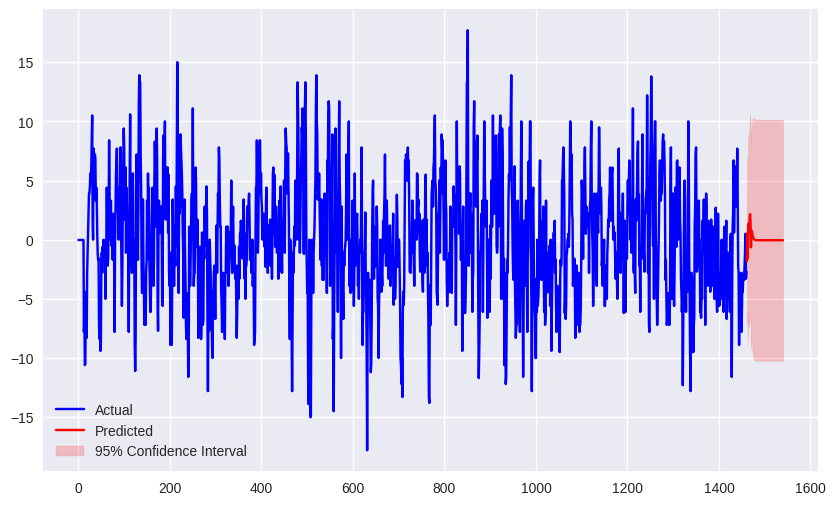

                                     SARIMAX Results                                      
Dep. Variable:                     temp_max_sdiff   No. Observations:                 1461
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -3528.453
Date:                            Thu, 14 Dec 2023   AIC                           7064.906
Time:                                    00:40:00   BIC                           7086.012
Sample:                                         0   HQIC                          7072.783
                                           - 1461                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6267      0.031     19.917      0.000       0.565       0.688
ma.L1         -1.1088      0.024   

In [ ]:
# Get forecast with confidence intervals
forecast = results.get_forecast(steps=80)
forecast_ci = forecast.conf_int()

# Plot Actual vs Predicted with Confidence Intervals
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['temp_max_sdiff'], label='Actual', color='blue')
ax.plot(range(len(df), len(df) + len(forecast.predicted_mean)), forecast.predicted_mean, label='Predicted', color='red')

# Fill between the confidence intervals
ax.fill_between(range(len(df), len(df) + len(forecast.predicted_mean)),
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')

ax.legend()
plt.show()

# Print the summary
print(results.summary())


In [ ]:
from IPython.core.debugger import set_trace

import os
import time

plt.style.use(style= 'seaborn')
%matplotlib inline

In [ ]:
df2= df[['temp_max_sdiff']].copy()

In [ ]:
df2.describe()

,temp_max_sdiff
count,1461.000000
mean,-0.025190
std,4.976086
min,-17.800000
25%,-3.300000
50%,0.000000
75%,3.300000
max,17.700000


# Train and Test

In [ ]:
from sklearn.metrics import mean_squared_error

n = int(len(df2) * 0.8)
train = df2['temp_max_sdiff'][:n]
test = df2['temp_max_sdiff'][n:]

In [ ]:
print(len(train))
print(len(test))

1168
293


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model=  sm.tsa.statespace.SARIMAX(train,
                                     order= (1,1,1),
                                     seasonal_order= (0,0,1,12),
                                     enforce_stationarity= False,
                                     enforce_invertibility= False)
result= model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     temp_max_sdiff   No. Observations:                 1168
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood               -2803.635
Date:                            Thu, 14 Dec 2023   AIC                           5615.269
Time:                                    00:40:03   BIC                           5635.470
Sample:                                         0   HQIC                          5622.894
                                           - 1168                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6389      0.035     18.311      0.000       0.571       0.707
ma.L1         -1.1055      0.027    -41.245      0.000      -1.158      -1.053
ma.S.L12      -1.0000     21.335     -0.047      0.963     -42.817      40.817
sigma2         5.9064    126.034      0.047      0.963    -241.115     252.928
===================================================================================
Ljung-Box (L1) (Q):                   7.30   Jarque-Bera (JB):                 6.11
Prob(Q):                              0.01   Prob(JB):                         0.05
Heteroskedasticity (H):               1.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:

# Forecast using the trained model
forecast_result = result.forecast(steps=len(test))

# Evaluate the Model
mse = mean_squared_error(test, forecast_result)
rmse = mse**0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 22.53526923610959
Root Mean Squared Error: 4.7471327384126925


In [ ]:
# For cheking the model is good or not
test.mean(), np.sqrt(test.var())

(-0.35767918088737205, 4.718317272399556)

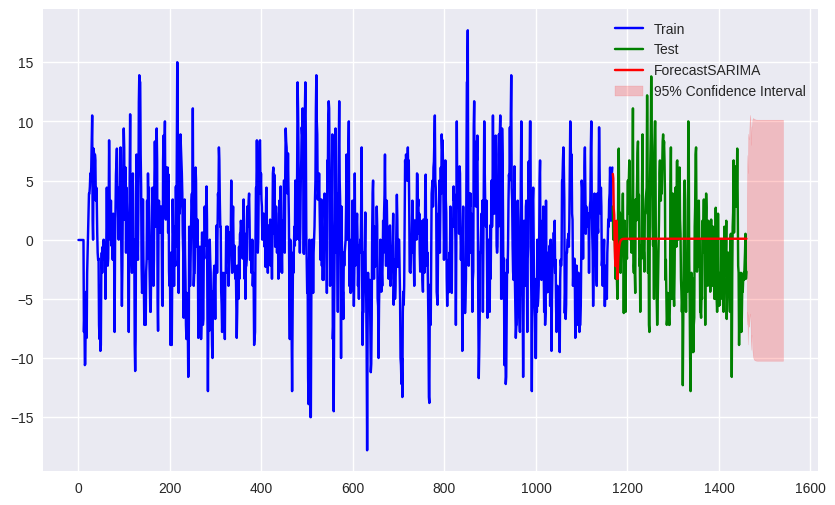

In [ ]:
# Get forecast with confidence intervals
forecast = results.get_forecast(steps=80)
forecast_ci = forecast.conf_int()

# Plot Train, Test, and Forecast with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='green')
plt.plot(forecast_result, label='ForecastSARIMA', color='red')

# Fill between the confidence intervals for the forecast
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.show()


<Axes: >

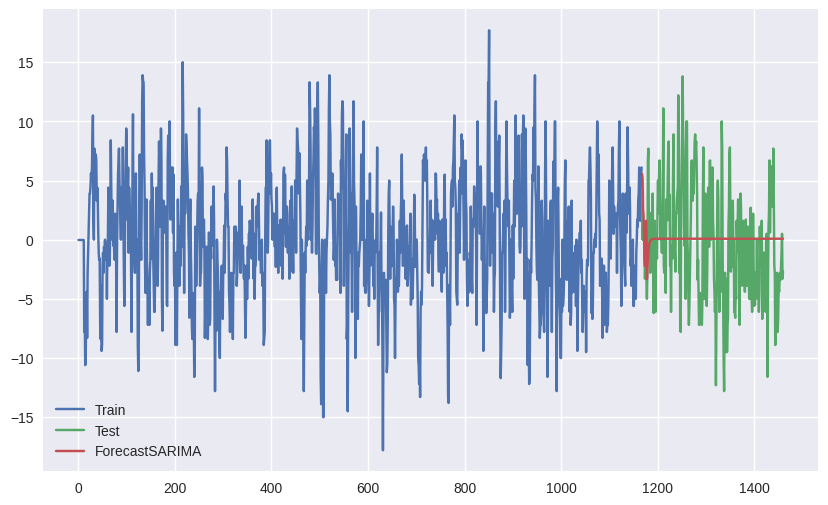

In [ ]:
train.plot(legend= True, label= 'Train', figsize= (10,6))
test.plot(legend= True, label= 'Test')
forecast_result.plot(legend= True, label= 'ForecastSARIMA')

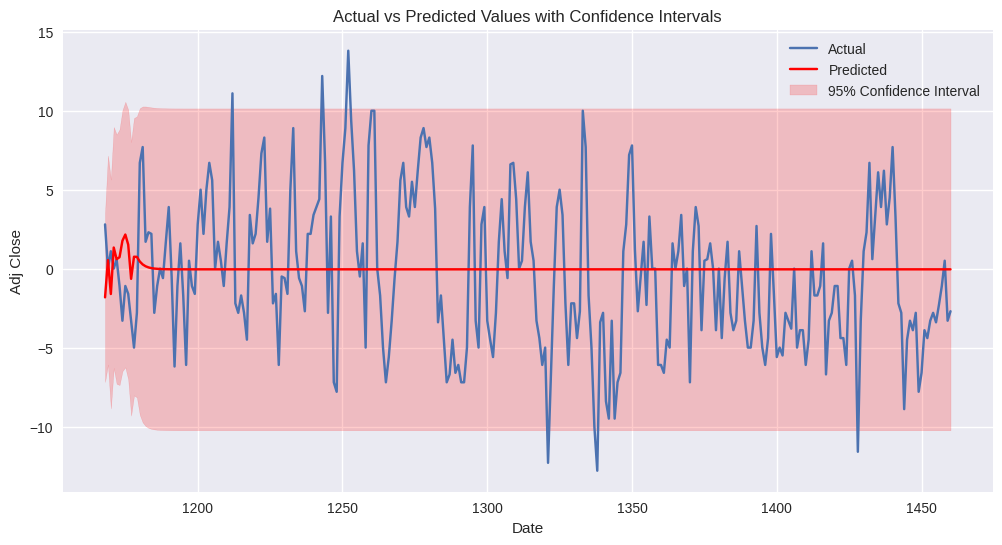

In [ ]:
import matplotlib.pyplot as plt

# Get forecast with confidence intervals
forecast = results.get_forecast(steps=len(test))  # Assuming the length of the test set is used for forecasting
forecast_ci = forecast.conf_int()

# Plot Actual, Predicted, and Confidence Intervals
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast.predicted_mean, color='red', label='Predicted')

# Fill between the confidence intervals
plt.fill_between(test.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('Actual vs Predicted Values with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


# Predict Future Data

In [ ]:
final_model= sm.tsa.statespace.SARIMAX(df2['temp_max_sdiff'],
                                     order= (1,1,1),
                                     seasonal_order= (0,0,1,12),
                                     enforce_stationarity= False,
                                     enforce_invertibility= False).fit()      # Build on Full Dataset

In [ ]:
predication= final_model.predict(len(df2),len(df2)+60)  #predicting for next 60  days

<Axes: >

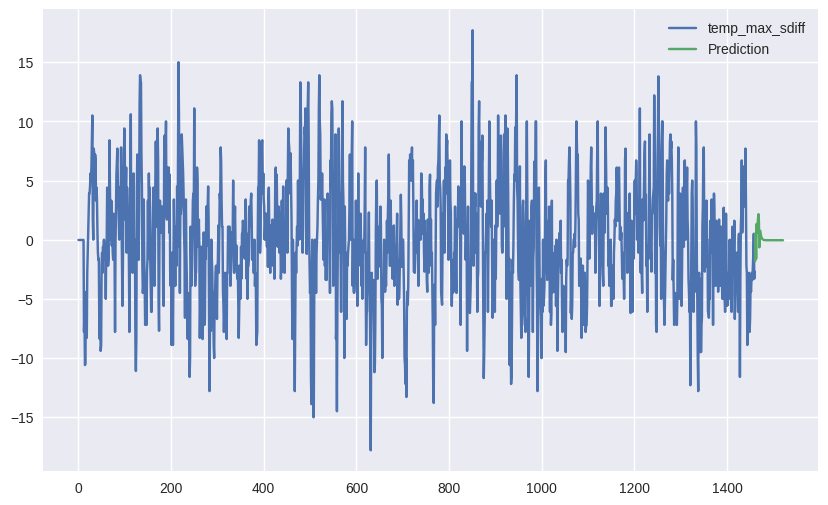

In [ ]:
df2.plot(legend= True, label= 'Train', figsize= (10,6))
predication.plot(legend= True, label= 'Prediction')

# GARCH MOdel

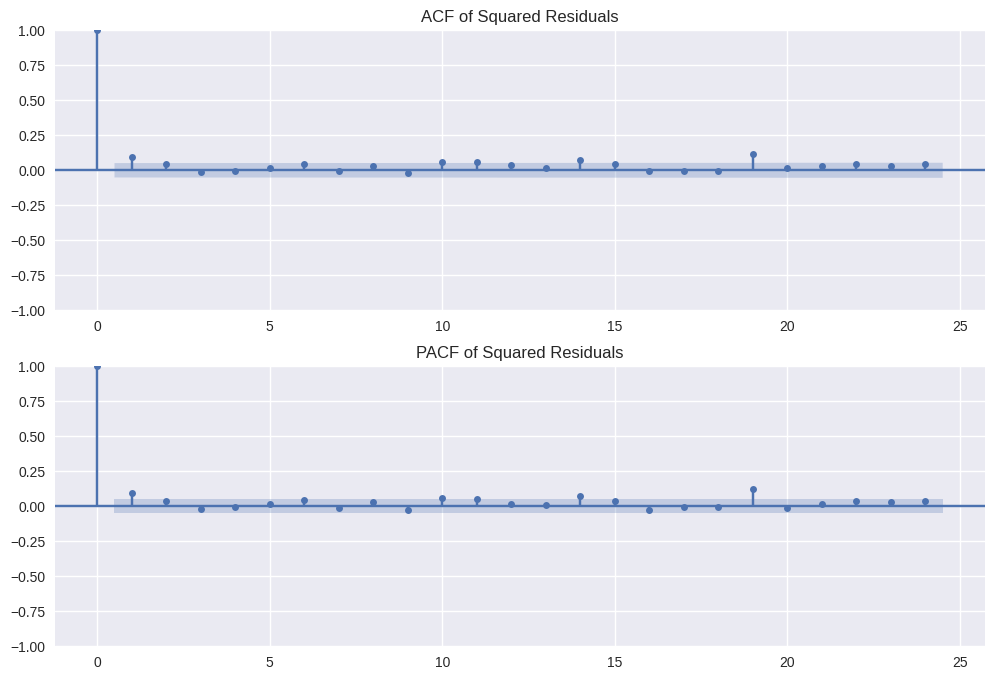

In [ ]:
# Calculate residuals
residuals = final_model.resid

# Square the residuals
squared_residuals = residuals ** 2

# Plot ACF and PACF of squared residuals
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(squared_residuals, ax=ax1, lags=24)
ax1.set_title('ACF of Squared Residuals')

# PACF plot
plot_pacf(squared_residuals, ax=ax2, lags=24)
ax2.set_title('PACF of Squared Residuals')

plt.show()

From this ACF and PACF we can see that our p,q values are 1,1

In [ ]:
pip install arch


In [ ]:
import arch

# Fit GARCH model
garch_model = arch.arch_model(squared_residuals, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()

# Display the model summary
print(garch_result.summary())


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1061708257.3826332
Iteration:      2,   Func. Count:     14,   Neg. LLF: 6543.114266967121
Iteration:      3,   Func. Count:     22,   Neg. LLF: 6842.47819117556
Iteration:      4,   Func. Count:     29,   Neg. LLF: 5722.830356217648
Iteration:      5,   Func. Count:     35,   Neg. LLF: 5678.756507059823
Iteration:      6,   Func. Count:     41,   Neg. LLF: 5676.612779434765
Iteration:      7,   Func. Count:     46,   Neg. LLF: 5676.612579369896
Iteration:      8,   Func. Count:     51,   Neg. LLF: 5676.612577728514
Iteration:      9,   Func. Count:     55,   Neg. LLF: 5676.6125777284105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5676.612577728514
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:               

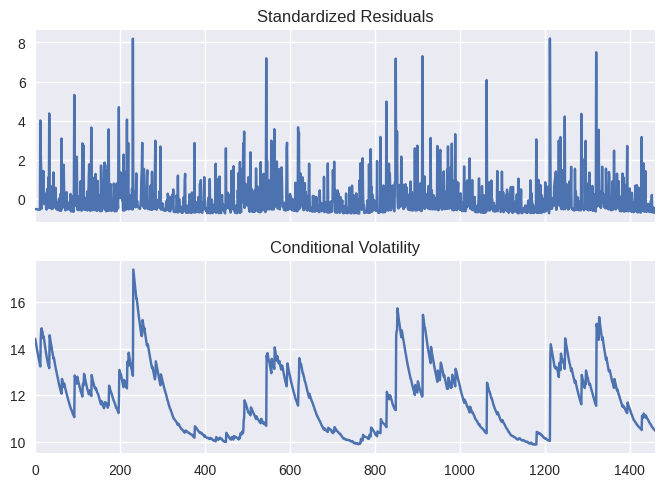

In [ ]:
# Plot results and diagnostics
garch_result.plot()
plt.show()
